In [53]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

### -- EXPLORATORY ANALYSIS OF TRAIN DATA --
*findings conclusion from exploratory analysis of the train data*

number of buildings : 260601\
number of predictor variables : 38 ( 30 - numeric datatype, 8 - categorical datatype)\
number of null values : 0 

In [2]:
predictor_var_train = pd.read_csv('train_values.csv')
predictor_var_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#removing the building id - creating dataframe with only predictor variables
predictor_df_train = predictor_var_train.drop(columns = "building_id")
predictor_df_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
response_var_train = pd.read_csv('train_labels.csv')
response_var_train.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
#removing the building id - creating dataframe with only response variables
labels_train = response_var_train.drop(columns = "building_id")
labels_train.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [19]:
#concatenating with the damage labels
bldg_configuration_train = pd.concat([predictor_df_train,labels_train ], axis = 1).reindex(predictor_df_train.index)
bldg_configuration_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [9]:
#finding data type and dimension of the predictor dataframe
print("Data type : ", type(predictor_df_train))
print("Data dims : ", predictor_df_train.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (260601, 38)


In [10]:
#finding the datatype of each variable 
predictor_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [13]:
#statistical description of all the numeric predictor variables
predictor_df_train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*the statistical description suggests that despite the numerical data type some variables are discrete with only 0 or 1 as their value - such as: has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, and etc.*

In [66]:
import warnings
warnings.filterwarnings("ignore")

#creating a dataframe with only the variables with object data tyoe (categorical predictor variables)
obj_predictor_df_train = pd.DataFrame()
obj_predictor_df_train = pd.concat([obj_predictor_df_train, predictor_df_train.select_dtypes(include = np.object) ], axis = 1).reindex(predictor_df_train.select_dtypes(include = np.object).index)
obj_predictor_df_train.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


Number of types of unique categories : 3
land_surface_condition
t                         216757
n                          35528
o                           8316
dtype: int64


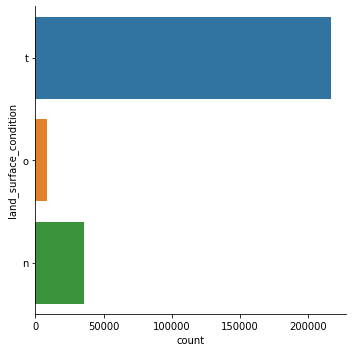

Number of types of unique categories : 5
foundation_type
r                  219196
w                   15118
u                   14260
i                   10579
h                    1448
dtype: int64


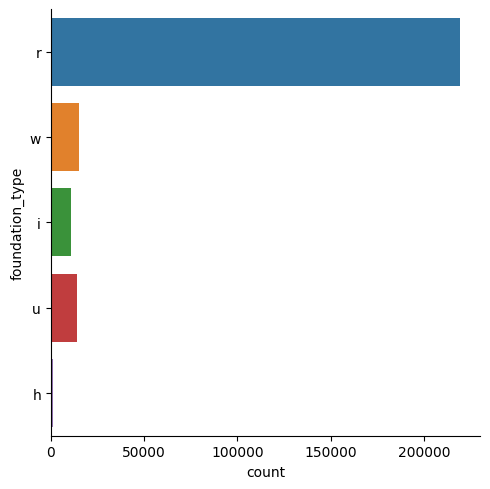

Number of types of unique categories : 3
roof_type
n            182842
q             61576
x             16183
dtype: int64


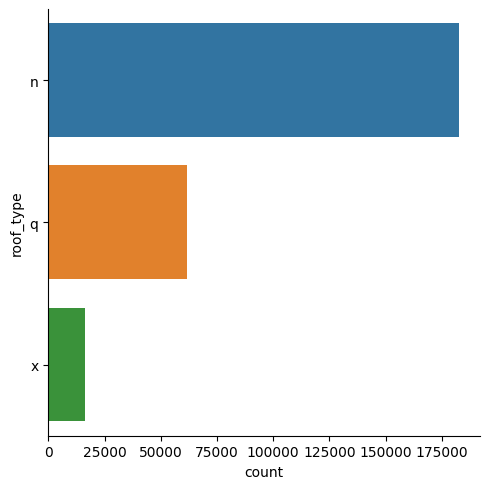

Number of types of unique categories : 5
ground_floor_type
f                    209619
x                     24877
v                     24593
z                      1004
m                       508
dtype: int64


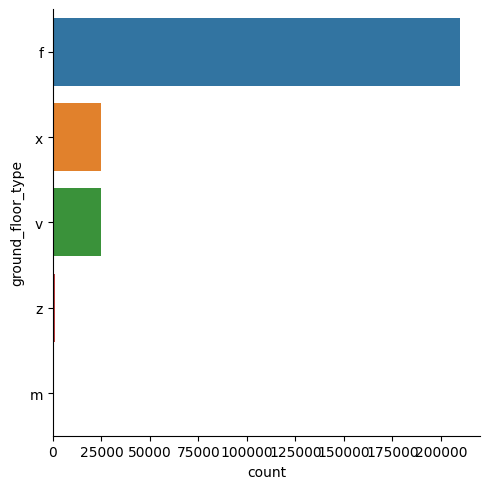

Number of types of unique categories : 4
other_floor_type
q                   165282
x                    43448
j                    39843
s                    12028
dtype: int64


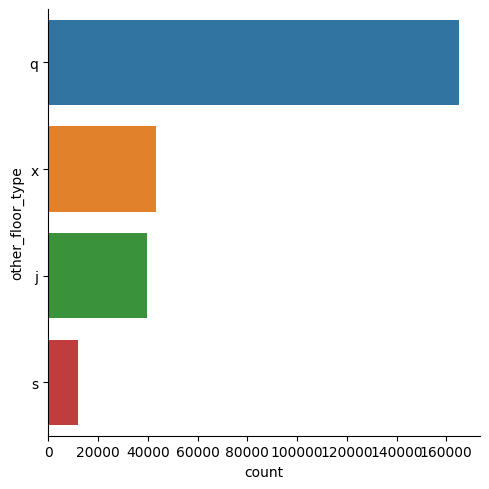

Number of types of unique categories : 4
position
s           202090
t            42896
j            13282
o             2333
dtype: int64


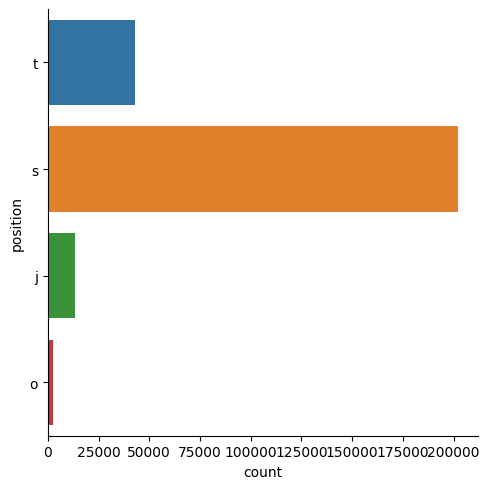

Number of types of unique categories : 10
plan_configuration
d                     250072
q                       5692
u                       3649
s                        346
c                        325
a                        252
o                        159
m                         46
n                         38
f                         22
dtype: int64


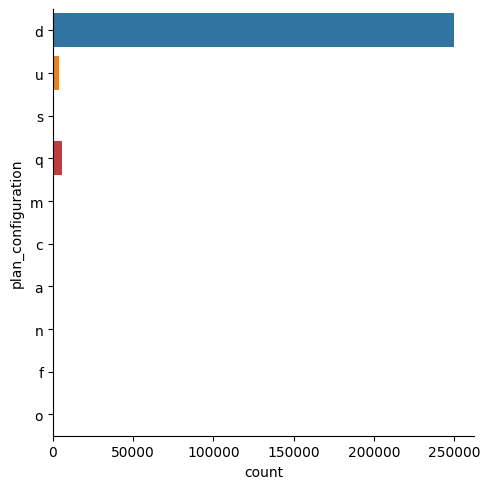

Number of types of unique categories : 4
legal_ownership_status
v                         250939
a                           5512
w                           2677
r                           1473
dtype: int64


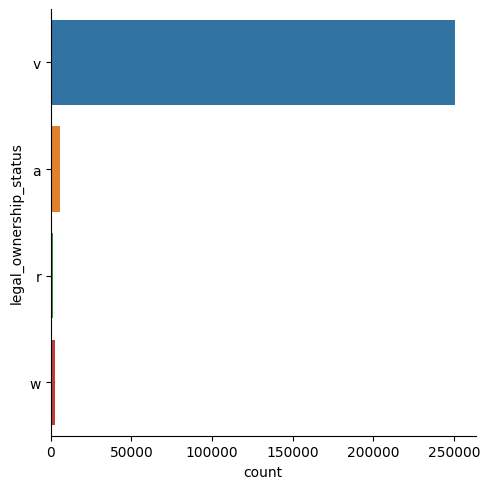

In [17]:
#checking and making sure that all the variables with object data types are categorical

#iterating through each object variable finding the unique values for each variable
for var in obj_predictor_df_train:
    var_df = pd.DataFrame(obj_predictor_df_train[var])
    print("Number of types of unique categories :", (len(var_df[var].unique())))
    print(var_df.value_counts())
    
    #visualizing the findings
    sb.catplot(y = var, data = var_df, kind = "count")
    plt.show()

In [23]:
#extracting the continuous numeric variables within the predictor dataframe
predictor_df_train_numeric = predictor_df_train.loc[:, ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage', 'height_percentage'] ]
predictor_df_train_numeric.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,6,487,12198,2,30,6,5
1,8,900,2812,2,10,8,7
2,21,363,8973,2,10,5,5
3,22,418,10694,2,10,6,5
4,11,131,1488,3,30,8,9


In [132]:
predictor_df_train_numeric.corr()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734
age,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074
area_percentage,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645
height_percentage,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000


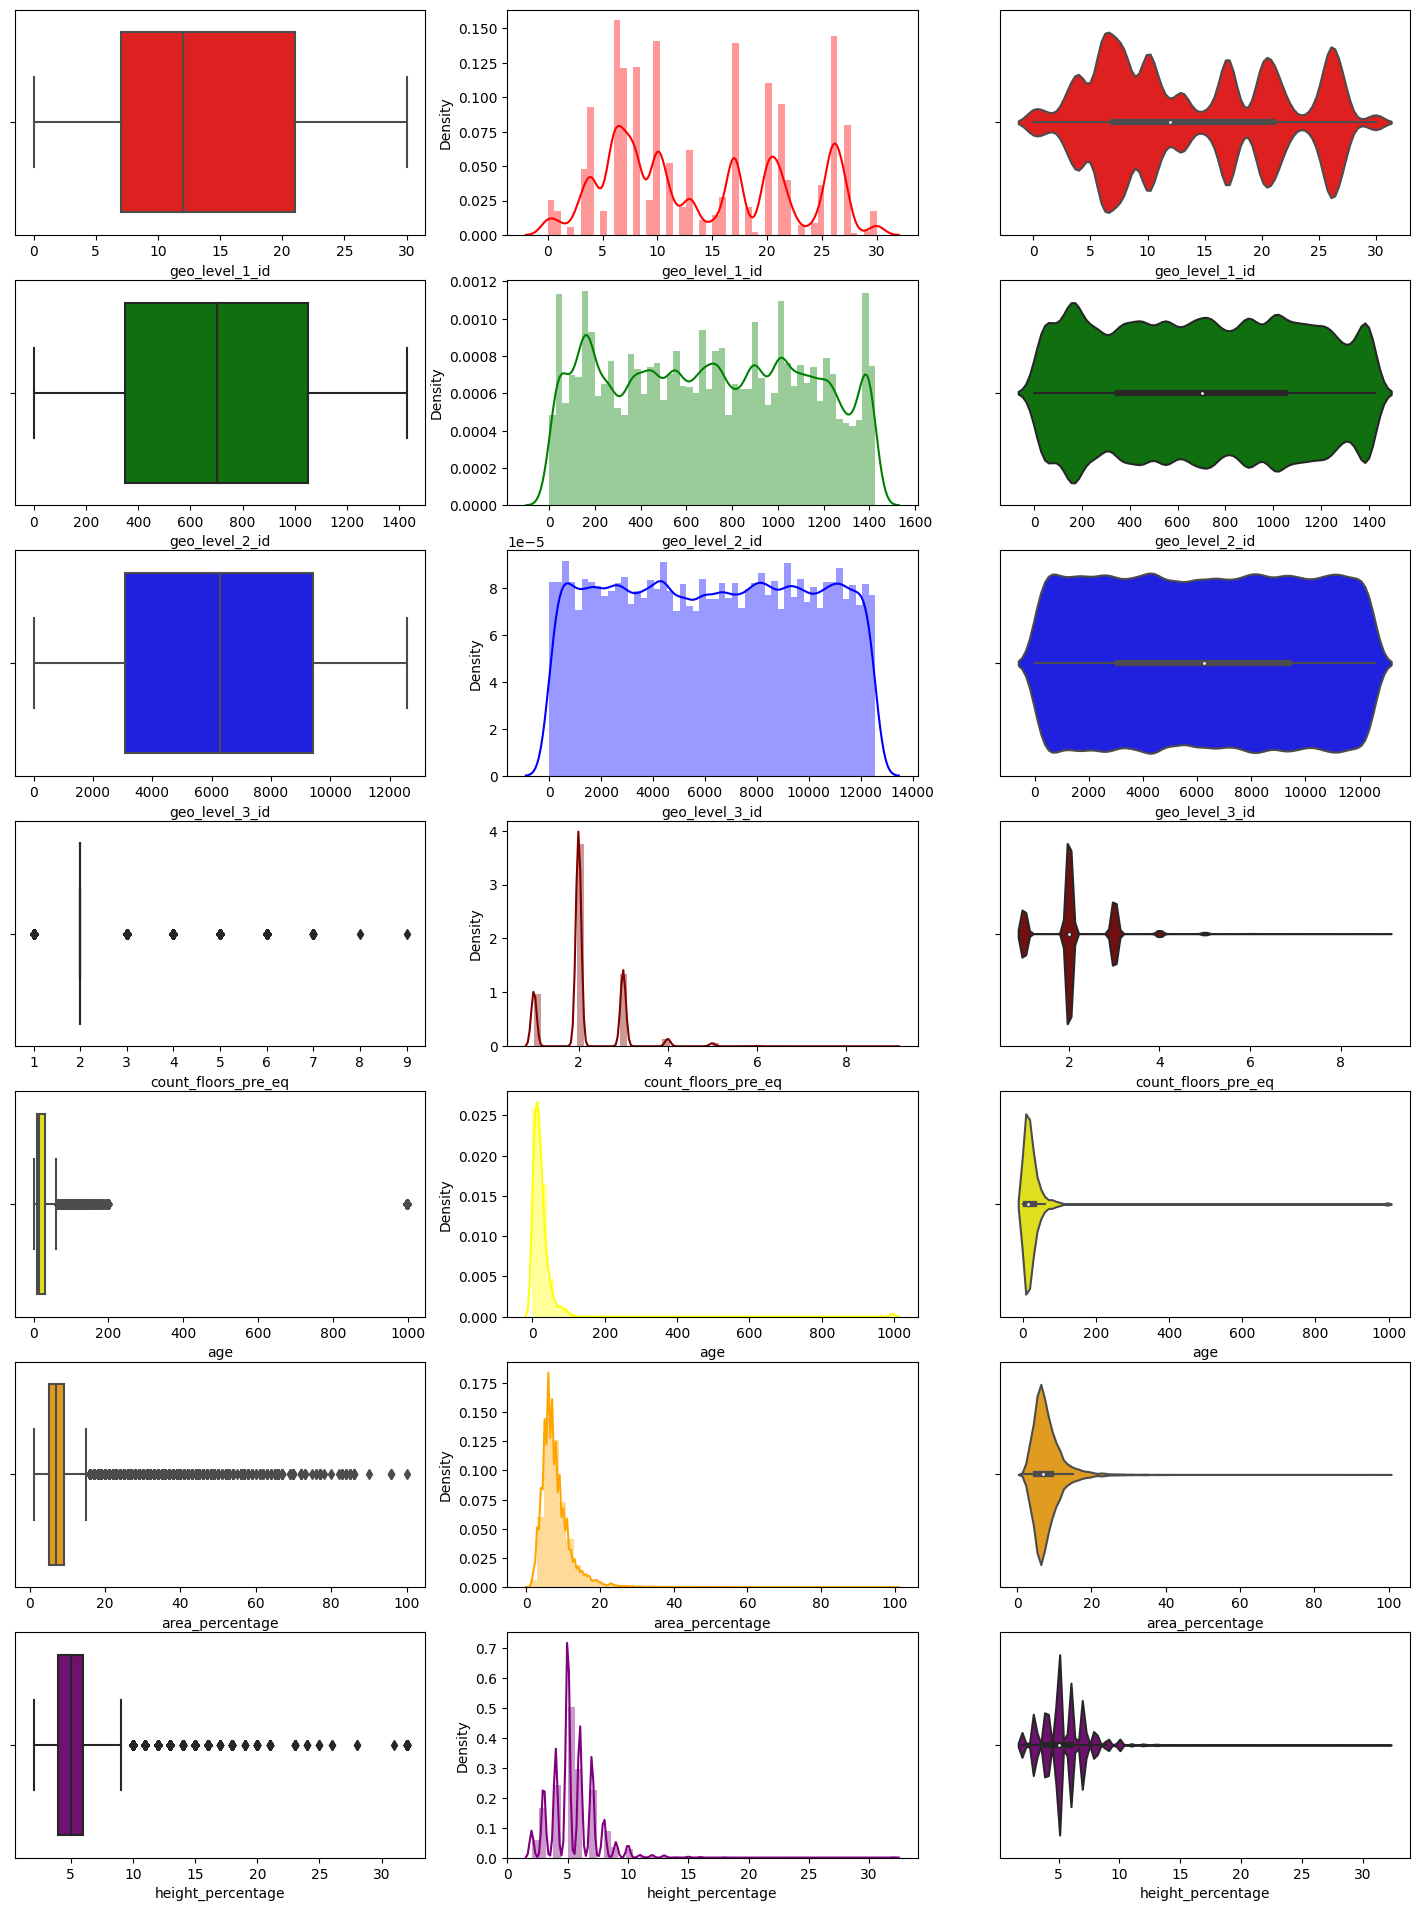

In [135]:
#visualizing statistical description of numeric variables
import warnings
warnings.filterwarnings("ignore")

# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 24))
colors = ["red", "green", "blue", "maroon", "yellow", "orange", "purple"]

count = 0
for var in predictor_df_train_numeric:
    sb.boxplot(predictor_df_train_numeric[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(predictor_df_train_numeric[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(predictor_df_train_numeric[var], color = colors[count], ax = axes[count,2])
    count += 1

In [37]:
#extracting all the variables with discrete values
predictor_df_train_categoric = predictor_df_train.iloc[:,-31:]
predictor_df_train_categoric.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,t,r,n,f,q,t,d,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,o,r,n,x,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,t,r,n,f,x,t,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,t,r,n,f,x,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,t,r,n,f,x,s,d,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
predictor_df_train.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

### --- TEST DATA ---
number of buildings: 86868

In [65]:
predictor_var_test = pd.read_csv('test_values .csv')
predictor_df_test = predictor_var_test.drop(columns = "building_id")
display(predictor_df_test)
predictor_df_test.info()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
2,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
4,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
86864,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
86865,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0
86866,6,1041,912,2,5,9,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   geo_level_1_id                          86868 non-null  int64 
 1   geo_level_2_id                          86868 non-null  int64 
 2   geo_level_3_id                          86868 non-null  int64 
 3   count_floors_pre_eq                     86868 non-null  int64 
 4   age                                     86868 non-null  int64 
 5   area_percentage                         86868 non-null  int64 
 6   height_percentage                       86868 non-null  int64 
 7   land_surface_condition                  86868 non-null  object
 8   foundation_type                         86868 non-null  object
 9   roof_type                               86868 non-null  object
 10  ground_floor_type                       86868 non-null  object
 11  ot

In [62]:
response_var_test = pd.read_csv('train_labels.csv')
labels_test = pd.DataFrame(response_var_test['damage_grade'])
labels_test.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [63]:
#concatenating with the damage labels
bldg_configuration_test = pd.concat([predictor_df_test,labels_test], axis = 1).reindex(predictor_df_test.index)
bldg_configuration_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,17.0,596.0,11307.0,3.0,20.0,7.0,6.0,t,r,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,6.0,141.0,11987.0,2.0,25.0,13.0,5.0,t,r,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,22.0,19.0,10044.0,2.0,5.0,4.0,5.0,t,r,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,26.0,39.0,633.0,1.0,0.0,19.0,3.0,t,r,x,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,17.0,289.0,7970.0,3.0,15.0,8.0,7.0,t,r,q,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [68]:
obj_predictor_df_test = pd.DataFrame()
obj_predictor_df_test = pd.concat([obj_predictor_df_test, predictor_df_test.select_dtypes(include = np.object) ], axis = 1).reindex(predictor_df_test.select_dtypes(include = np.object).index)
display(obj_predictor_df_test)

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,s,d,v
1,t,r,n,f,q,s,d,v
2,t,r,n,f,q,s,d,v
3,t,r,x,v,j,t,d,v
4,t,r,q,f,q,t,d,v
...,...,...,...,...,...,...,...,...
86863,t,r,q,f,q,t,d,w
86864,n,r,n,f,q,s,d,v
86865,t,r,n,f,j,s,d,v
86866,t,r,n,f,q,s,d,a


In [69]:
predictor_df_test_numeric = predictor_df_test.loc[:, ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage', 'height_percentage'] ]
predictor_df_test_numeric.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,17,596,11307,3,20,7,6
1,6,141,11987,2,25,13,5
2,22,19,10044,2,5,4,5
3,26,39,633,1,0,19,3
4,17,289,7970,3,15,8,7


In [70]:
predictor_df_test_categoric = predictor_df_test.iloc[:,-31:]
predictor_df_test_categoric.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,t,r,n,f,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,t,r,n,f,q,s,d,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,t,r,n,f,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,t,r,x,v,j,t,d,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,t,r,q,f,q,t,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### -- CLEANING AND PREPARING TRAIN DATA --

*feature-scaling to standardize the data*

we implement feature-scaling to standardize our data in order to bring down all the features to a common scale. Hence, despite the range of values our results would not be distorted, in order to achieve more accurate results.

In [27]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
data = trans.fit_transform(predictor_df_train_numeric)
display(data)

array([[-0.98341369, -0.51870494,  1.6290546 , ...,  0.0471003 ,
        -0.45946001, -0.22641883],
       [-0.73445934,  0.48199788, -0.9450174 , ..., -0.22476517,
        -0.00410967,  0.81610871],
       [ 0.88374396, -0.81915808,  0.74461158, ..., -0.22476517,
        -0.68713518, -0.22641883],
       ...,
       [ 0.38583526, -1.57513697,  0.5224724 , ...,  0.38693215,
        -0.45946001,  0.81610871],
       [ 1.50612985, -1.60421308, -1.20856771, ..., -0.22476517,
         1.36194134,  0.29484494],
       [ 0.88374396, -1.67690335,  0.77971505, ..., -0.22476517,
        -0.23178484,  0.29484494]])

,0,1,2,3,4,5,6
0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419
1,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109
2,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419
3,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419
4,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636
...,...,...,...,...,...,...,...
260596,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-1.268946
260597,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.226419
260598,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,0.816109
260599,1.506130,-1.604213,-1.208568,-0.178274,-0.224765,1.361941,0.294845


                  0             1             2             3             4  \
count  2.606010e+05  2.606010e+05  2.606010e+05  2.606010e+05  2.606010e+05   
mean  -9.762282e-16 -5.359383e-17 -1.073202e-16  1.171892e-15 -6.061013e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.730277e+00 -1.698710e+00 -1.716197e+00 -1.552536e+00 -3.606979e-01   
25%   -8.589365e-01 -8.506572e-01 -8.734392e-01 -1.782737e-01 -2.247652e-01   
50%   -2.365506e-01  2.242047e-03  3.324917e-03 -1.782737e-01 -1.567988e-01   
75%    8.837440e-01  8.454493e-01  8.650055e-01 -1.782737e-01  4.710030e-02   
max    2.004039e+00  1.758924e+00  1.730251e+00  9.441562e+00  1.316461e+01   

                  5             6  
count  2.606010e+05  2.606010e+05  
mean   6.753314e-16 -5.253162e-16  
std    1.000002e+00  1.000002e+00  
min   -1.597836e+00 -1.790210e+00  
25%   -6.871352e-01 -7.476826e-01  
50%   -2.317848e-01 -2.264188e-01  
75%    2.235655e-01  2.948449e-01  


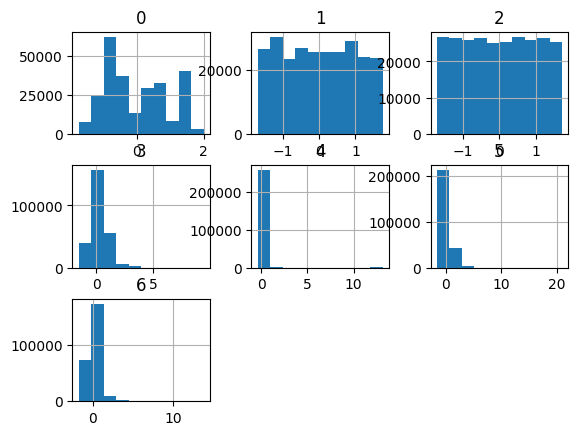

In [29]:
#converting the scaled data back into a dataframe
dataset = pd.DataFrame(data)
display(dataset)

#summarizing result of standardization of data
print(dataset.describe())

# histograms of the variables to visualize
dataset.hist()
plt.show()

In [30]:
#renaming the scaled dataframe columns
dataset.rename(columns={0: 'geo_level_1_id'}, inplace=True)
dataset.rename(columns={1: 'geo_level_2_id'}, inplace=True)
dataset.rename(columns={2: 'geo_level_3_id'}, inplace=True)
dataset.rename(columns={3: 'count_floors_pre_eq'}, inplace=True)
dataset.rename(columns={4: 'age'}, inplace=True)
dataset.rename(columns={5: 'area_percentage'}, inplace=True)
dataset.rename(columns={6: 'height_percentage'}, inplace=True)
dataset.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419
1,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109
2,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419
3,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419
4,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636


*one-hot encoding of the data*

due to some of the features being nominal, in order to ensure that the machine learning does not assume that higher numbers refer to higher importance and since the order in this case does not matter, we one-hot encode the categorical variables

In [34]:
#one-hot encode the data using pandas get_dummies
predictor_df_onehotencode_train = pd.get_dummies(predictor_df_train)
display(predictor_df_onehotencode_train.iloc[:,-38:])

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
260597,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
260598,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


*creating dataframe with both one-hot encoded categorical variables and standardized numeric variables*

In [38]:
joint_predictor_df = pd.concat([predictor_df_train_categoric,dataset ], axis = 1).reindex(predictor_df_train_categoric.index)
joint_predictor_df.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,t,r,n,f,q,t,d,1,1,0,...,0,0,0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419
1,o,r,n,x,q,s,d,0,1,0,...,0,0,0,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109
2,t,r,n,f,x,t,d,0,1,0,...,0,0,0,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419
3,t,r,n,f,x,s,d,0,1,0,...,0,0,0,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419
4,t,r,n,f,x,s,d,1,0,0,...,0,0,0,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636


In [39]:
#dataframe with one-hot encoded and standardized data
joint_predictor_df_onehotencode = pd.get_dummies(joint_predictor_df)
display(joint_predictor_df_onehotencode.iloc[:,-38:])

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
260597,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
260598,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


*creating arrays with labels dataframe*

In [40]:
#creating arrays using the labels dataframe
labels_train_array = np.array(labels_train)
display(labels_train_array)

array([[3],
       [2],
       [3],
       ...,
       [3],
       [2],
       [3]])

### --TEST DATA --

*feature scaling - standardization*

array([[ 0.38754474, -0.26158239,  1.38275375, ..., -0.08922346,
        -0.23159783,  0.29571029],
       [-0.98239858, -1.36231347,  1.56912195, ..., -0.0211157 ,
         1.13893036, -0.22869027],
       [ 1.01024624, -1.65745455,  1.03660223, ..., -0.29354676,
        -0.91686192, -0.22869027],
       ...,
       [ 1.01024624,  1.04477977,  0.39746894, ...,  0.31942314,
        -1.14528329, -1.27749141],
       [-0.98239858,  0.8149568 , -1.46621303, ..., -0.29354676,
         0.2252449 , -0.22869027],
       [ 1.50840745, -1.61632834,  0.0477545 , ..., -0.225439  ,
         0.68208763, -0.75309084]])

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,0.387545,-0.261582,1.382754,1.190666,-0.089223,-0.231598,0.295710
1,-0.982399,-1.362313,1.569122,-0.182880,-0.021116,1.138930,-0.228690
2,1.010246,-1.657455,1.036602,-0.182880,-0.293547,-0.916862,-0.228690
3,1.508407,-1.609071,-1.542679,-1.556426,-0.361655,2.509459,-1.277491
4,0.387545,-1.004273,0.468179,1.190666,-0.157331,-0.003176,0.820111
...,...,...,...,...,...,...,...
86863,-1.231479,-0.239810,-0.723207,1.190666,0.591854,2.737880,0.295710
86864,-0.484237,1.700380,1.547196,1.190666,-0.021116,-0.460019,0.820111
86865,1.010246,1.044780,0.397469,-1.556426,0.319423,-1.145283,-1.277491
86866,-0.982399,0.814957,-1.466213,-0.182880,-0.293547,0.225245,-0.228690


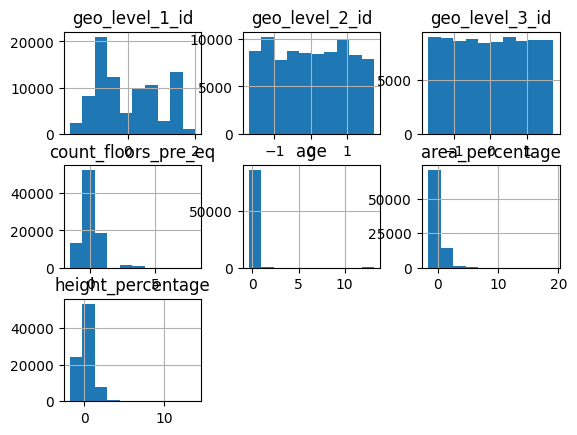

In [76]:
datatest = trans.fit_transform(predictor_df_test_numeric)
display(datatest)

#convert the array back into a dataframe
datatestset = pd.DataFrame(datatest)
datatestset.rename(columns={0: 'geo_level_1_id'}, inplace=True)
datatestset.rename(columns={1: 'geo_level_2_id'}, inplace=True)
datatestset.rename(columns={2: 'geo_level_3_id'}, inplace=True)
datatestset.rename(columns={3: 'count_floors_pre_eq'}, inplace=True)
datatestset.rename(columns={4: 'age'}, inplace=True)
datatestset.rename(columns={5: 'area_percentage'}, inplace=True)
datatestset.rename(columns={6: 'height_percentage'}, inplace=True)
display(datatestset)

#visualizing using histogram
datatestset.hist()
plt.show()

*one-hot encoding the data*

In [79]:
#one-hot encode the data using pandas get_dummies
predictor_df_onehotencode_test = pd.get_dummies(predictor_df_test)
display(predictor_df_onehotencode_test.iloc[:,-38:])

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
86864,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
86865,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
86866,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


*dataframe with one-hot encoded and standardized data*

In [78]:
joint_predictor_test_df = pd.concat([predictor_df_test_categoric,datatestset ], axis = 1).reindex(predictor_df_test_categoric.index)
joint_predictor_test_df_onehotencode = pd.get_dummies(joint_predictor_test_df)
display(joint_predictor_test_df_onehotencode.iloc[:,-38:])

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
86864,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
86865,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
86866,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


*creating arrays with labels dataframe*

In [80]:
labels_test_array = np.array(labels_test)
display(labels_test_array)

array([[3],
       [2],
       [3],
       ...,
       [3],
       [2],
       [3]])

## --MACHINE LEARNING--

### -- TRAINING THE TRAIN DATASET WITH RANDOM FOREST CLASSIFIER ALGORITHM --
- doesn't require feature scaling
- best parameters {n_estimators=100, random_state=100}

In [42]:
forest = RandomForestClassifier (n_estimators=100, random_state=100)

forest.fit(predictor_df_onehotencode_train,labels_train_array)

RandomForestClassifier(random_state=100)

In [82]:
prediction_forest = forest.predict(predictor_df_onehotencode_train)
print(prediction_forest)

[3 2 3 ... 3 2 3]


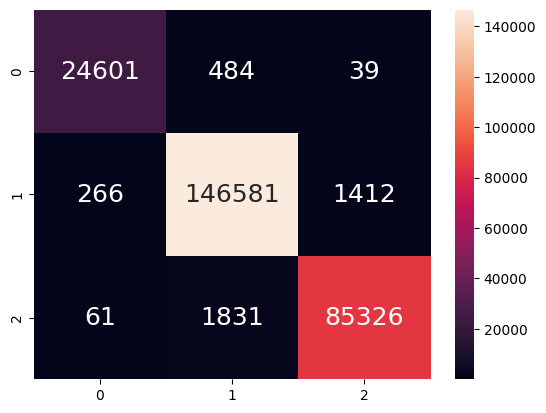


Accuracy: 0.9843

Micro Precision: 0.9843
Micro Recall: 0.9843
Micro F1-score: 0.9843

Macro Precision: 0.9849
Macro Recall: 0.9821
Macro F1-score: 0.9835

Weighted Precision: 0.9843
Weighted Recall: 0.9843
Weighted F1-score: 0.9843

Classification Report

                precision    recall  f1-score   support

damage_grade 1       0.99      0.98      0.98     25124
damage_grade 2       0.98      0.99      0.99    148259
damage_grade 3       0.98      0.98      0.98     87218

      accuracy                           0.98    260601
     macro avg       0.98      0.98      0.98    260601
  weighted avg       0.98      0.98      0.98    260601



In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sb.heatmap(confusion_matrix(labels_train, prediction_forest),
           annot = True, fmt=".0f", annot_kws={"size": 18},)
plt.show()

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(labels_train, prediction_forest)))

print('Micro Precision: {:.4f}'.format(precision_score(labels_train, prediction_forest, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(labels_train, prediction_forest, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(labels_train, prediction_forest, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(labels_train, prediction_forest, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(labels_train, prediction_forest, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(labels_train, prediction_forest, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(labels_train, prediction_forest, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(labels_train, prediction_forest, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(labels_train, prediction_forest, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(labels_train, prediction_forest, target_names=['damage_grade 1', 'damage_grade 2', 'damage_grade 3']))


### -- TEST DATA --
- score obtained by inputting the csv file of labels predicted into the website
- score for the test dataset: 0.7161

In [85]:
prediction_forest_test = forest.predict(predictor_df_onehotencode_test)
print(prediction_forest_test)

[2 2 2 ... 2 2 1]


In [86]:
predictions_test_forest_df = pd.DataFrame(prediction_forest_test)
predictions_test_forest_df.rename(columns={0: 'damage_grade'}, inplace=True)

#concatenating with the damage labels
labels_test_predict_forest = pd.concat([pd.DataFrame(predictor_var_test['building_id']), predictions_test_forest_df ], axis = 1).reindex(predictions_test_forest_df.index)
labels_test_predict_forest.head(n=10)

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,1
4,421793,3
5,871976,3
6,691228,1
7,896100,3
8,343471,2
9,766647,2


In [87]:
labels_test_predict_forest.to_csv('labels_test_predict_forest.csv', index = False)

### -- TRAINING THE TRAIN DATASET WITH K-NEAREST NEIGHBORS ALGORITHM --
- Standardize features using sklearn.preprocessing.StandardScaler
- set parameters {n_neighbors = 7, n_jobs = -1}

In [50]:
#using sklearn.neighbors.KNeighborsClassifier to fit train values and train labels
knn = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1) 

In [51]:
knn.fit(joint_predictor_df_onehotencode, labels_train_array)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [96]:
prediction_knn = knn.predict(joint_predictor_df_onehotencode)
print(prediction_knn)

[3 2 3 ... 3 1 3]


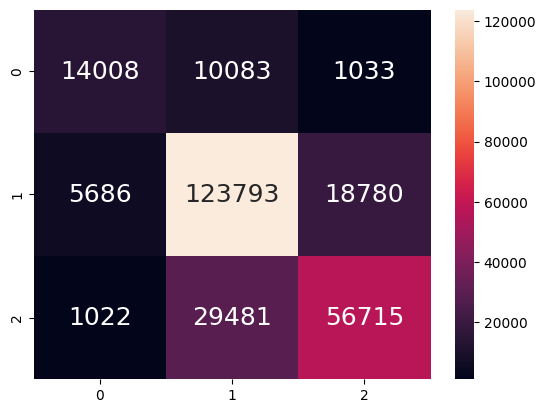


Accuracy: 0.7464

Micro Precision: 0.7464
Micro Recall: 0.7464
Micro F1-score: 0.7464

Macro Precision: 0.7250
Macro Recall: 0.6809
Macro F1-score: 0.6995

Weighted Precision: 0.7443
Weighted Recall: 0.7464
Weighted F1-score: 0.7428

Classification Report

                precision    recall  f1-score   support

damage_grade 1       0.68      0.56      0.61     25124
damage_grade 2       0.76      0.83      0.79    148259
damage_grade 3       0.74      0.65      0.69     87218

      accuracy                           0.75    260601
     macro avg       0.73      0.68      0.70    260601
  weighted avg       0.74      0.75      0.74    260601



In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sb.heatmap(confusion_matrix(labels_train, prediction_knn),
           annot = True, fmt=".0f", annot_kws={"size": 18},)
plt.show()

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(labels_train, prediction_knn)))

print('Micro Precision: {:.4f}'.format(precision_score(labels_train, prediction_knn, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(labels_train, prediction_knn, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(labels_train, prediction_knn, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(labels_train, prediction_knn, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(labels_train, prediction_knn, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(labels_train, prediction_knn, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(labels_train, prediction_knn, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(labels_train, prediction_knn, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(labels_train, prediction_knn, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(labels_train, prediction_knn, target_names=['damage_grade 1', 'damage_grade 2', 'damage_grade 3']))

### -- TEST DATA --
- Accuracy score for test dataset = 0.6668

In [98]:
prediction_knn_test = classifier.predict(joint_predictor_test_df_onehotencode)
print(prediction_knn_test)

[2 2 2 ... 2 2 2]


In [99]:
predictions_test_knn_df = pd.DataFrame(prediction_knn_test)
predictions_test_knn_df.rename(columns={0: 'damage_grade'}, inplace=True)

#concatenating with the damage labels
labels_test_predict_knn = pd.concat([pd.DataFrame(predictor_var_test['building_id']), predictions_test_knn_df ], axis = 1).reindex(predictions_test_knn_df.index)
labels_test_predict_knn.head(n=10)

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3
5,871976,3
6,691228,2
7,896100,3
8,343471,2
9,766647,2


In [100]:
labels_test_predict_knn.to_csv('labels_test_predict_knn.csv', index = False)

### -- TRAINING THE TRAIN DATASET WITH STOCHASTIC GRADIENT DESCENT ALGORITHM--
- Standardize features using sklearn.preprocessing.StandardScaler

In [90]:
#using sklearn.linear_model.SGDClassifier
sgd = SGDClassifier(loss="log", penalty="l2")
sgd.fit(joint_predictor_df_onehotencode, labels_train)

SGDClassifier(loss='log')

In [91]:
prediction_sgd = sgd.predict(joint_predictor_df_onehotencode)
print(prediction_sgd)

[2 2 3 ... 3 2 2]


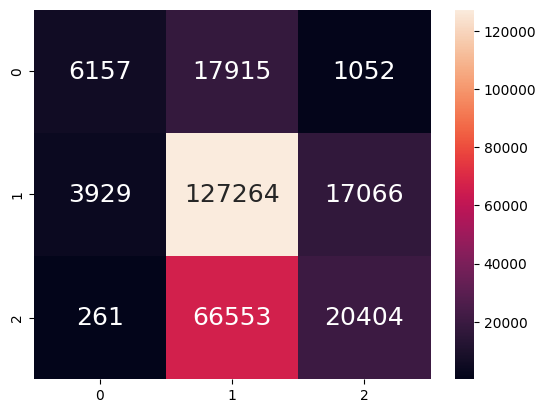


Accuracy: 0.5903

Micro Precision: 0.5903
Micro Recall: 0.5903
Micro F1-score: 0.5903

Macro Precision: 0.5753
Macro Recall: 0.4458
Macro F1-score: 0.4596

Weighted Precision: 0.5766
Weighted Recall: 0.5903
Weighted F1-score: 0.5443

Classification Report

                precision    recall  f1-score   support

damage_grade 1       0.60      0.25      0.35     25124
damage_grade 2       0.60      0.86      0.71    148259
damage_grade 3       0.53      0.23      0.32     87218

      accuracy                           0.59    260601
     macro avg       0.58      0.45      0.46    260601
  weighted avg       0.58      0.59      0.54    260601



In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sb.heatmap(confusion_matrix(labels_train, prediction_sgd),
           annot = True, fmt=".0f", annot_kws={"size": 18},)
plt.show()

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(labels_train, prediction_sgd)))

print('Micro Precision: {:.4f}'.format(precision_score(labels_train, prediction_sgd, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(labels_train, prediction_sgd, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(labels_train, prediction_sgd, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(labels_train, prediction_sgd, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(labels_train, prediction_sgd, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(labels_train, prediction_sgd, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(labels_train, prediction_sgd, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(labels_train, prediction_sgd, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(labels_train, prediction_sgd, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(labels_train, prediction_sgd, target_names=['damage_grade 1', 'damage_grade 2', 'damage_grade 3']))

### -- TEST DATA --
- Accuracy score for the test dataset: 0.5870

In [93]:
prediction_sgd_test = sgd.predict(joint_predictor_test_df_onehotencode)
print(prediction_sgd_test)

[2 2 2 ... 2 2 2]


In [94]:
predictions_test_sgd_df = pd.DataFrame(prediction_sgd_test)
predictions_test_sgd_df.rename(columns={0: 'damage_grade'}, inplace=True)

#concatenating with the damage labels
labels_test_predict_sgd = pd.concat([pd.DataFrame(predictor_var_test['building_id']), predictions_test_sgd_df ], axis = 1).reindex(predictions_test_sgd_df.index)
labels_test_predict_sgd.head(n=10)

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3
5,871976,3
6,691228,2
7,896100,2
8,343471,2
9,766647,2


In [95]:
labels_test_predict_sgd.to_csv('labels_test_predict_sgd.csv', index = False)

### -- COMBINING THE MACHINE LEARNING MODELS WITH VOTING --
- Accuracy score = 0.6245

In [112]:
RandomForest = pd.read_csv('labels_test_predict_forest.csv')
KNearestNeighbor = pd.read_csv('labels_test_predict_knn.csv')
StochasticGradientDescent = pd.read_csv('labels_test_predict_sgd.csv')

print(RandomForest.shape)
print(KNearestNeighbor.shape)
print(StochasticGradientDescent.shape)

(86868, 2)
(86868, 2)
(86868, 2)


In [127]:
newdf = pd.DataFrame(columns = ['damage_grade'])
newdf

,damage_grade


In [128]:
mods = [StochasticGradientDescent, KNearestNeighbor, RandomForest]

for i in range(len(StochasticGradientDescent)):
    randdict = {1:0,2:0,3:0}
    for model in mods:
        curr = model.iloc[i,1]
        randdict[curr] += 1
    winner = max(randdict, key = randdict.get)
    winner_df = [winner]
    newdf.loc[len(newdf)] = winner_df
    
display(newdf)

,damage_grade
0,2
1,2
2,2
3,2
4,3
...,...
86863,2
86864,2
86865,2
86866,2


In [129]:
voting_labels_test_predict = pd.concat([pd.DataFrame(predictor_var_test['building_id']), newdf ], axis = 1).reindex(StochasticGradientDescent.index)
display(voting_labels_test_predict)


,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [130]:
voting_labels_test_predict.building_id = voting_labels_test_predict.building_id.astype(np.int64)

In [131]:
voting_labels_test_predict.to_csv('labels_test_predict_voting.csv', index = False)